In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("mathe_dataset.csv", sep=";", encoding="ISO-8859-1")

In [3]:
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


# General Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


# Univariate Data Analysis

### Student ID variable

In [11]:
# Total Unique Student ID values
df["Student ID"].nunique()

372

In [14]:
# Number of rows per student
value_counts = df["Student ID"].value_counts()
print(f"Minimum #rows for a student: {np.min(value_counts)}")
print(f"Maximum #rows for a student: {np.max(value_counts)}")
print(f"Average #rows for a student: {np.mean(value_counts)}")

Minimum #rows for a student: 1
Maximum #rows for a student: 727
Average #rows for a student: 25.661290322580644


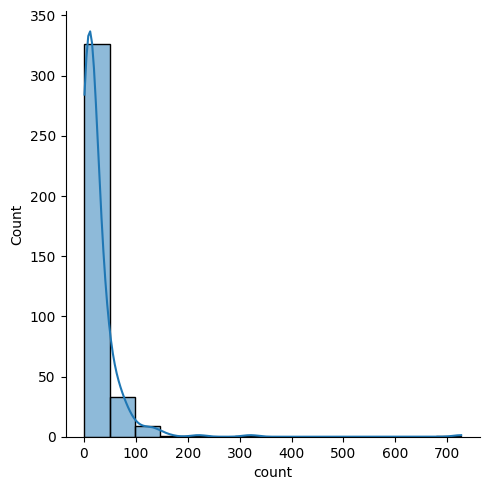

In [15]:
import seaborn as sns
sns.displot(value_counts, kde=True, bins=15)

The above plot indicates that while the number of questions asked per student are in a huge range, majority of questions per student are in the range of 0 and 50. Thus we can consider these outlier data points as their frequency is insignificant.

### Student Country

In [12]:
# Total Unique Countries
df["Student Country"].nunique()

8

In [13]:
# Number of rows by country
df["Student Country"].value_counts()

Student Country
Portugal              5495
Lithuania             1443
Italy                 1358
Slovenia               755
Ireland                300
Russian Federation     107
Romania                 60
Spain                   28
Name: count, dtype: int64

### Question ID

In [16]:
# Total Unique Question ID values
df["Question ID"].nunique()

833

In [17]:
# Number of times a question is asked
value_counts = df["Question ID"].value_counts()
print(f"Minimum #rows for a question: {np.min(value_counts)}")
print(f"Maximum #rows for a question: {np.max(value_counts)}")
print(f"Average #rows for a question: {np.mean(value_counts)}")

Minimum #rows for a question: 1
Maximum #rows for a question: 103
Average #rows for a question: 11.459783913565426


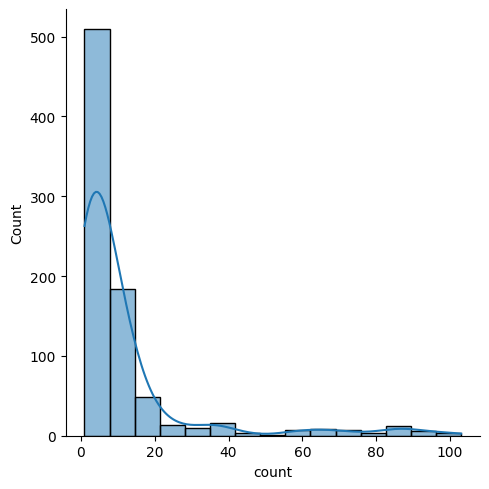

In [18]:
import seaborn as sns
sns.displot(value_counts, kde=True, bins=15)

Most of the questions are asked lesser than 5 times, with majority lesser than 20 times. Thus, an average of 11 makes sense for the distribution. Also, it's worth noting that the questions are not repeated too many times considering the number of students we have in the data.
This indicates that there aren't any bias considering the number of questions asked to the students, as they're mostly not repeated too many times.

### Type of Answer

In [19]:
df["Type of Answer"].value_counts()

Type of Answer
0    5076
1    4470
Name: count, dtype: int64

### Question Level

In [20]:
df["Question Level"].value_counts()

Question Level
Basic       7844
Advanced    1702
Name: count, dtype: int64

The distribution of data over Question Level is not balanced, with majority of rows directing at Basic Questions.

### Topic

In [21]:
df["Topic"].nunique()

14

In [22]:
df["Topic"].value_counts()

Topic
Linear Algebra                         5726
Fundamental Mathematics                 818
Complex Numbers                         592
Differentiation                         579
Analytic Geometry                       358
Statistics                              340
Numerical Methods                       310
Optimization                            182
Real Functions of a single variable     164
Integration                             144
Probability                             128
Differential Equations                  108
Graph Theory                             55
Set Theory                               42
Name: count, dtype: int64

The data considering the Topic Class is not balanced across all classes. But we haven't yet considered the question as a level of filtering these value counts.

### Subtopic

In [23]:
df["Subtopic"].nunique()

24

In [24]:
df["Subtopic"].value_counts()

Subtopic
Vector Spaces                                         2749
Linear Transformations                                2127
Complex Numbers                                        592
Algebraic expressions, Equations, and Inequalities     496
Linear Systems                                         420
Analytic Geometry                                      358
Statistics                                             340
Elementary Geometry                                    322
Derivatives                                            317
Numerical Methods                                      310
Matrices and Determinants                              300
Partial Differentiation                                262
Eigenvalues and Eigenvectors                           130
Probability                                            128
Nonlinear Optimization                                 126
Integration Techniques                                 111
Differential Equations                         

### Keywords

In [25]:
keywords = df["Keywords"]

In [28]:
keywords = [k.split(",") for k in keywords]

In [33]:
# Flatten the list of lists
flattened = [keyword for sublist in keywords for keyword in sublist]

# Convert to a Pandas Series and use value_counts()
pd.Series(flattened).value_counts()

Span                               1844
Subspace                           1465
Linear combination                 1254
Basis                              1112
Linear application                  824
                                   ... 
Graphical method                      3
 Integration by parts                 2
Assignment problem                    2
Incidence matrix                      2
Partial fractions decomposition       1
Name: count, Length: 194, dtype: int64

# Bi-variate Data Analysis

In [34]:
import matplotlib.pyplot as plt

def get_stacked_bar_plot(df, col_1, col_2):
    # Create a count table
    count_table = pd.crosstab(df[col_1], df[col_2])
    
    # Plot as a stacked bar chart
    count_table.plot(kind="bar", stacked=True, colormap="viridis")
    plt.ylabel("Count")
    plt.title(f"Stacked Bar Plot of {col_1} and {col_2}")
    plt.legend(title=col_2)
    plt.show()

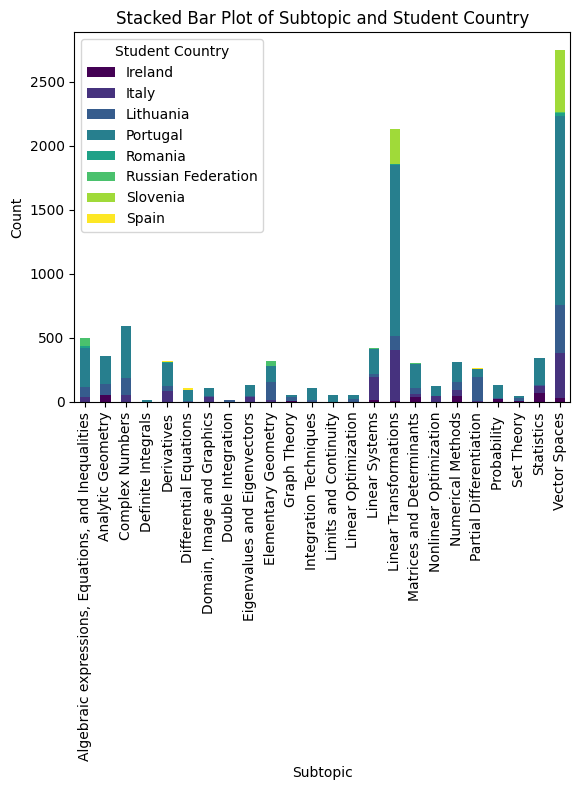

In [37]:
# Student Country vs Subtopic
get_stacked_bar_plot(df, "Subtopic", "Student Country")

- Vector Spaces and Linear Transformations are the most used Subtopics for creating Questions, with countries of Lithuania, Portugal, Slovenia and Italy having the most data in these subtopics.
- Spain, Russian Federation and Romania are underrepresented, which is expected noting the Univariate Analysis of the Student Country.

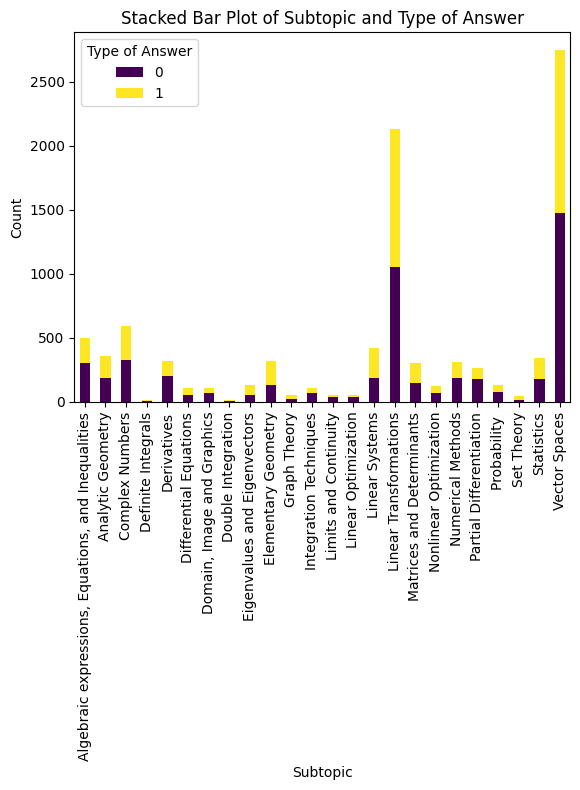

In [38]:
# Type of Answer vs Subtopic
get_stacked_bar_plot(df, "Subtopic", "Type of Answer")

In [42]:
pd.crosstab(df["Subtopic"], df["Type of Answer"], normalize="index")

Type of Answer,0,1
Subtopic,,
"Algebraic expressions, Equations, and Inequalities",0.612903,0.387097
Analytic Geometry,0.511173,0.488827
Complex Numbers,0.545608,0.454392
Definite Integrals,0.266667,0.733333
Derivatives,0.643533,0.356467
Differential Equations,0.462963,0.537037
"Domain, Image and Graphics",0.654206,0.345794
Double Integration,0.444444,0.555556
Eigenvalues and Eigenvectors,0.430769,0.569231


The distribution of correct and incorrect answers is almost equal. Although in majority of the Subtopics, the answers are more likely to be incorrect.

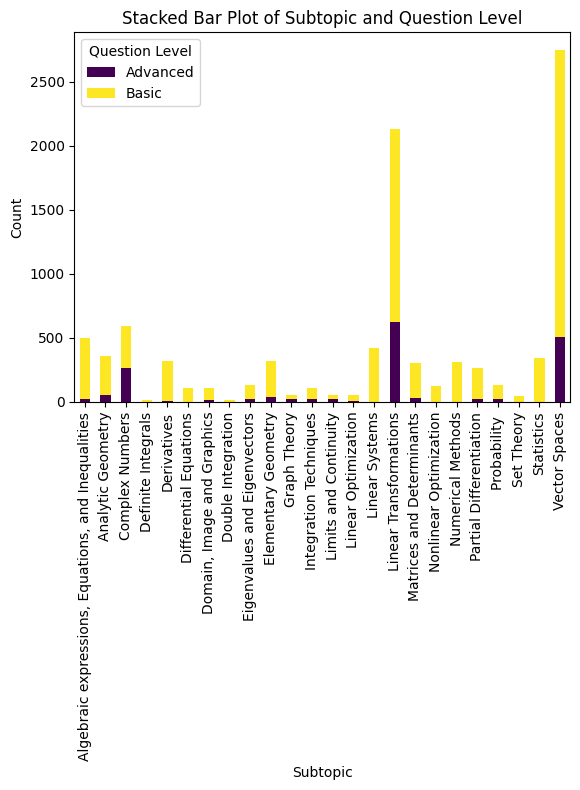

In [43]:
# Question Level vs Subtopic
get_stacked_bar_plot(df, "Subtopic", "Question Level")

In [44]:
pd.crosstab(df["Subtopic"], df["Question Level"], normalize="index")

Question Level,Advanced,Basic
Subtopic,,
"Algebraic expressions, Equations, and Inequalities",0.050403,0.949597
Analytic Geometry,0.139665,0.860335
Complex Numbers,0.445946,0.554054
Definite Integrals,0.000000,1.000000
Derivatives,0.012618,0.987382
Differential Equations,0.018519,0.981481
"Domain, Image and Graphics",0.168224,0.831776
Double Integration,0.000000,1.000000
Eigenvalues and Eigenvectors,0.200000,0.800000


For the subtopics, Complex Numbers, Limits and Continuity, Graph Theory and Linear Transformations there is a high number of advanced questions asked. Although, for all other subtopics, majority of questions are of easy difficulty.

In [47]:
# Topic vs Subtopic

# Count unique subtopics per topic
subtopic_counts = df.groupby("Topic")["Subtopic"].nunique()
print(subtopic_counts)

Topic
Analytic Geometry                      1
Complex Numbers                        1
Differential Equations                 1
Differentiation                        2
Fundamental Mathematics                2
Graph Theory                           1
Integration                            3
Linear Algebra                         5
Numerical Methods                      1
Optimization                           2
Probability                            1
Real Functions of a single variable    2
Set Theory                             1
Statistics                             1
Name: Subtopic, dtype: int64


As we can observe, there aren't a lot of different subtopics per topic. The maximum is 5 but, in most cases it's only 1 subtopic per topic.

In [56]:
# Keywords vs Subtopic
df["Keywords"] = df["Keywords"].apply(lambda x: x.split(","))
df_exploded = df.explode("Keywords")
# Count keyword occurrences per subtopic
keyword_counts = df_exploded.groupby("Subtopic")["Keywords"].value_counts().unstack(fill_value=0)

In [57]:
keyword_counts

Keywords,Integration by parts,and total probability rules,multiplication,Addition,Adjacency matrix,Algebraic form,Area,Area of a planar region,Assignment problem,Axioms of probability,...,Trigonometric rules,Trigonometric substitution,Unconstrained optimization,Undetermined solution of linear system,Union of sets,Variance,Venn diagram,Volume of revolution,x-simple region (type II),y-simple region (type I)
Subtopic,,,,,,,,,,,,,,,,,,,,,
"Algebraic expressions, Equations, and Inequalities",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Analytic Geometry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Complex Numbers,0,0,0,0,0,196,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Definite Integrals,2,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,5,0,0
Derivatives,0,0,0,0,0,0,0,0,0,0,...,297,0,0,0,0,0,0,0,0,0
Differential Equations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Domain, Image and Graphics",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Double Integration,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,3,11
Eigenvalues and Eigenvectors,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


In [59]:
keyword_overall = df_exploded["Keywords"].value_counts()

In [60]:
keyword_overall

Keywords
Span                               1844
Subspace                           1465
Linear combination                 1254
Basis                              1112
Linear application                  824
                                   ... 
Graphical method                      3
 Integration by parts                 2
Assignment problem                    2
Incidence matrix                      2
Partial fractions decomposition       1
Name: count, Length: 194, dtype: int64